# This Lab is open from 6:00 am  9/15 - 11:59 pm on 9/18 

This Lab is about handling dates in Panda's data frame. We will also explore frequency table and cumulative frequency chart.

We will be using a data set called climbing_statistics. Here are some details about this data set.

Date: Day of the record

Route: The route used to climb the Mt Rainier

Attempted: Number of people who attempted the climb

Succeeded: Number of people who succeeded in reaching the summit

Success Percentage: Percentage of people who succeeded in reaching the summit. 

The following link has more details. https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data#climbing_statistics.csv. 

Read about Pandas to_datetime function here. https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.to_datetime.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1
Upload the "climbing_statistics.csv" data in Jupyter notebook, check the data types of all the columns. Use the "to_datetime" function to change the "Date" column to datetime structure. Write a paragraph on why we did what we did and the importance of datetime structure.

In [3]:
df=pd.read_csv("climbing_statistics.csv")

df.head(4)

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4077 non-null   object 
 1   Route               4077 non-null   object 
 2   Attempted           4077 non-null   int64  
 3   Succeeded           4077 non-null   int64  
 4   Success Percentage  4077 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 159.4+ KB


In [5]:
df["Date"]= pd.to_datetime(df["Date"]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4077 non-null   datetime64[ns]
 1   Route               4077 non-null   object        
 2   Attempted           4077 non-null   int64         
 3   Succeeded           4077 non-null   int64         
 4   Success Percentage  4077 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 159.4+ KB


#### The previous data treated the date as a string, which woiuld have made it impossible to perform date time operations. Hence it was converted to datetime from object.

### Problem 2
Use the groupby function to find out how many climbers attempted from which route. Use to_frame() and reset_index() functions to change the the output to a data frame. Is the output you just got a frequency table? Explain why or why not?

In [25]:
df.groupby(['Route']).Attempted.mean()

Route
Curtis RIngraham Directge           2.000000
Disappointment Cleaver              5.593475
Edmonds HW                          2.000000
Emmons-Winthrop                     4.822785
Fuhrer's Finger                     3.030769
Fuhrers Finger                      2.814815
Gibralter Chute                     2.600000
Gibralter Ledges                    2.618421
Ingraham Direct                     4.245283
Kautz Cleaver                       3.642857
Kautz Glacier                       5.214286
Kautz Headwall                      3.000000
Liberty RIngraham Directge          2.391304
Liberty Wall                        2.000000
Little Tahoma                       4.228571
Mowich Face                         2.000000
Nisqually Glacier                   7.000000
Ptarmigan RIngraham Directge        2.590909
Success Cleaver                     2.666667
Sunset Amphitheater                 2.000000
Sunset RIngraham Directge           2.000000
Tahoma Cleaver                      3.000000
Taho

In [53]:
df.groupby(['Route']).Attempted.mean().to_frame().reset_index()

,Route,Attempted
0,Curtis RIngraham Directge,2.000000
1,Disappointment Cleaver,5.593475
2,Edmonds HW,2.000000
3,Emmons-Winthrop,4.822785
4,Fuhrer's Finger,3.030769
5,Fuhrers Finger,2.814815
6,Gibralter Chute,2.600000
7,Gibralter Ledges,2.618421
8,Ingraham Direct,4.245283
9,Kautz Cleaver,3.642857


#### This can be thought of as a mean frequency table, as this table displays the mean values, and therefore it cant be considered as a complete frequency table.

### Problem 3
Create a new column called "Month" using the Date column. The month past in the Date column is the value of the "Month" column written as a word. For example, if the Date has an entry 2015-11-27, then the "Month" column will have an entry "November." Some tips are here. https://dfrieds.com/data-analysis/create-year-month-column.html

In [23]:
df['Month']=df['Date'].dt.strftime('%B')
df.head(4)

,Date,Route,Attempted,Succeeded,Success Percentage,Month
0,2015-11-27,Disappointment Cleaver,2,0,0.0,November
1,2015-11-21,Disappointment Cleaver,3,0,0.0,November
2,2015-10-15,Disappointment Cleaver,2,0,0.0,October
3,2015-10-13,Little Tahoma,8,0,0.0,October


### Problem 4
Make a frequency table of the variable "Succeeded" by month. Explain the output of why some months have large numbers, and some have small numbers. You can use one or more of the panda functions: Groupby, value_counts, and crosstab functions. https://stackoverflow.com/questions/40581312/how-to-create-a-frequency-table-in-pandas-python

In [37]:
succeeded_month=pd.crosstab(index=df["Succeeded"], columns = df["Month"])
succeeded_month

Month,April,August,December,February,January,July,June,March,May,November,October,September
Succeeded,,,,,,,,,,,,
0,65,317,1,25,26,471,454,33,258,3,9,150
1,0,14,0,0,0,12,22,0,8,0,1,3
2,3,137,0,0,8,209,187,3,59,0,0,30
3,0,83,0,1,0,159,122,0,41,0,0,17
4,2,55,0,0,1,84,83,1,11,0,0,8
5,0,22,0,0,0,55,29,0,15,0,0,3
6,0,27,0,0,1,66,33,1,7,0,0,12
7,0,36,0,0,0,28,31,1,10,0,0,7
8,0,20,0,0,0,34,33,0,11,0,0,10


### Problem 5
Plot the cumulative frequency chart for the number of succeeded climbers you found in problem 4. Here is an example. https://dfrieds.com/data-visualizations/when-use-cumulative-frequency-graph.html

In [48]:
class_tab=pd.crosstab(index=df["Succeeded"], columns="count")
class_tab

col_0,count
Succeeded,
0,1812
1,60
2,636
3,423
4,245
5,124
6,147
7,113
8,108


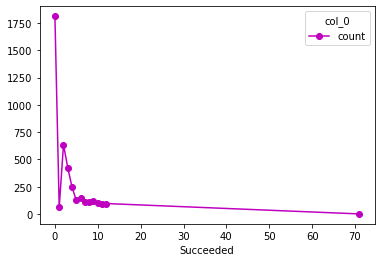

In [49]:
class_tab.plot(style='m-o')

In [50]:
class_tab["cumulative sum"]=class_tab["count"].cumsum()
class_tab

col_0,count,cumulative sum
Succeeded,,
0,1812,1812
1,60,1872
2,636,2508
3,423,2931
4,245,3176
5,124,3300
6,147,3447
7,113,3560
8,108,3668


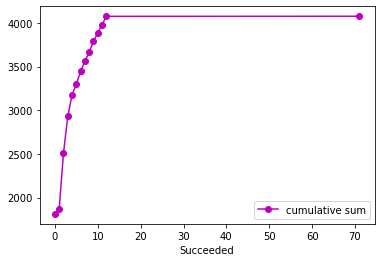

In [51]:
class_tab.plot(y="cumulative sum",style='m-o')